<a href="https://colab.research.google.com/github/poojagusain101/AI_detector/blob/main/AI_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing Necessary Packages annd modules

In [1]:
!pip install keras-core --upgrade
!pip install -q keras-nlp
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.8/571.8 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 59.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 53.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 70.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 54.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 31.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.15.1 requires tensorflow<2.16,>=2.15, but you have tensorflow 2.17.0 which is incompatible

Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras_core as keras
import keras_nlp
import seaborn as sns
import matplotlib.pyplot as plt

Using TensorFlow backend


In [3]:
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)
print("KerasNLP version:", keras_nlp.__version__)

TensorFlow version: 2.17.0
Keras version: 0.1.7
KerasNLP version: 0.14.0


Importing Dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/train_v2_drcat_02.csv',index_col=False)

In [6]:
df.head()

,text,label,prompt_name,source,RDizzl3_seven
0,Phones\n\nModern humans today are always on th...,0,Phones and driving,persuade_corpus,False
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False
2,Driving while the use of cellular devices\n\nT...,0,Phones and driving,persuade_corpus,False
3,Phones & Driving\n\nDrivers should not be able...,0,Phones and driving,persuade_corpus,False
4,Cell Phone Operation While Driving\n\nThe abil...,0,Phones and driving,persuade_corpus,False


Exploring the Dataset

In [7]:
df.shape

(44868, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44868 entries, 0 to 44867
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           44868 non-null  object
 1   label          44868 non-null  int64 
 2   prompt_name    44868 non-null  object
 3   source         44868 non-null  object
 4   RDizzl3_seven  44868 non-null  bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 1.4+ MB


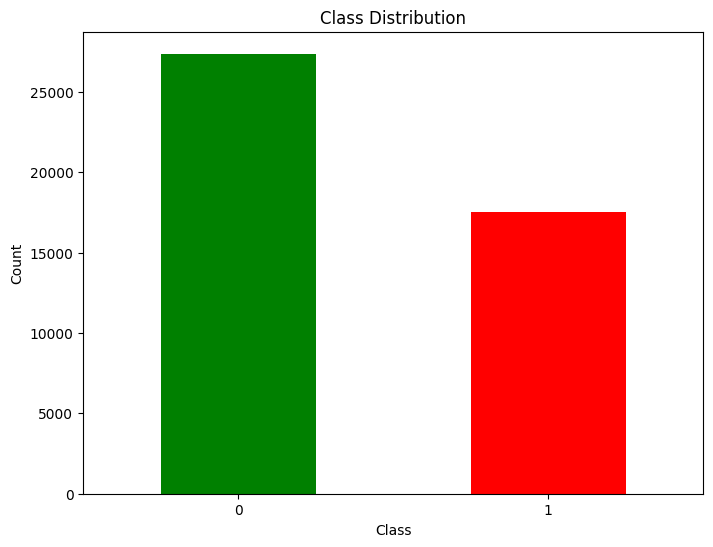

In [10]:
class_counts = df['label'].value_counts()
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

0(green) represents written by Human and 1(red) represent written by AI

In [11]:
df["label"].value_counts()

label
0    27371
1    17497
Name: count, dtype: int64

Count no. of words in each essay

In [12]:
df["text_length"] = df["text"].apply(lambda x : len(x.split()))


Text(0.5, 0.98, 'Distribution of the length per essay - Train dataset')

<Figure size 4000x5000 with 0 Axes>

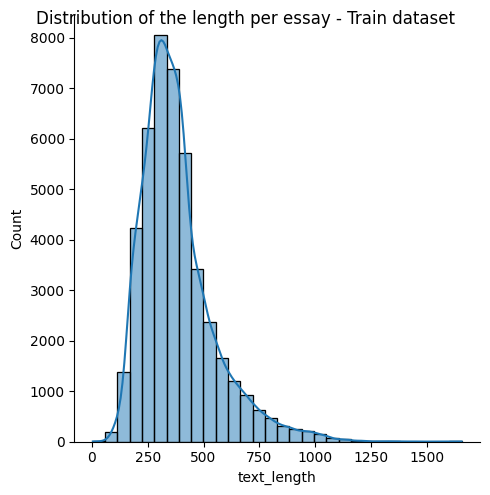

In [14]:
fig = plt.figure(figsize=(40,50))
plot = sns.displot(data=df,
                 x="text_length", bins=30, kde=True)
plot.fig.suptitle("Distribution of the length per essay - Train dataset")

In [15]:
df["text_length"].mean() + df["text_length"].std()

548.5474649045642

Creating the Model

In [16]:
# We choose 512 because it's the limit of DistilBert
SEQ_LENGTH = 512

# Use a shorter sequence length.
preprocessor = keras_nlp.models.DistilBertPreprocessor.from_preset(
    "distil_bert_base_en_uncased",
    sequence_length=SEQ_LENGTH,
)

# Pretrained classifier.
classifier = keras_nlp.models.DistilBertClassifier.from_preset(
    "distil_bert_base_en_uncased",
    num_classes=2,
    activation=None,
    preprocessor=preprocessor,
)

# Re-compile (e.g., with a new learning rate)
classifier.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=[
        keras.metrics.SparseCategoricalAccuracy()
   ]
)


# Access backbone programmatically (e.g., to change `trainable`).
classifier.backbone.trainable = False


classifier.summary()

100%|██████████| 140/140 [00:00<00:00, 48.6kB/s]


100%|██████████| 580/580 [00:00<00:00, 567kB/s]


100%|██████████| 226k/226k [00:00<00:00, 1.24MB/s]


100%|██████████| 515/515 [00:00<00:00, 462kB/s]


100%|██████████| 253M/253M [00:05<00:00, 51.5MB/s]


Preprocessor: "distil_bert_preprocessor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tokenizer (type)                                   ┃                                             Vocab # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ distil_bert_tokenizer (DistilBertTokenizer)        │                                              30,522 │
└────────────────────────────────────────────────────┴─────────────────────────────────────────────────────┘

Model: "distil_bert_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ distil_bert_backbone          │ (None, None, 768)         │      66,362,880 │ padding_mask[0][0],        │
│ (DistilBertBackbone)          │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ get_item (GetItem)            │ (None, 768)               │               0 │ distil_bert_backbone[0][0] │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pooled_dense (Dense)          │ (None, 768)               │         590,592 │ get_item[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ output_dropout (Dropout)      │ (None, 768)               │               0 │ pooled_dense[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ logits (Dense)                │ (None, 2)                 │           1,538 │ output_dropout[0][0]       │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 66,955,010 (255.41 MB)

 Trainable params: 592,130 (2.26 MB)

 Non-trainable params: 66,362,880 (253.15 MB)

In [17]:
# Split the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df["text"],
                                                    df["label"],
                                                    test_size=0.33,
                                                    random_state=42)

Fine Tuning DistilBert Model

In [19]:
# Fit
classifier.fit(x=X_train,
               y=y_train,
               validation_data=(X_test, y_test),
               epochs=1,
               batch_size=64
              )

470/470 ━━━━━━━━━━━━━━━━━━━━ 683s 1s/step - loss: 0.0701 - sparse_categorical_accuracy: 0.9590 - val_loss: 0.1440 - val_sparse_categorical_accuracy: 0.9627


In [20]:
y_pred_test = classifier.predict(X_test)

463/463 ━━━━━━━━━━━━━━━━━━━━ 238s 500ms/step


Printing results of X_test

In [23]:
print(np.argmax(y_pred_test,axis=1))

[1 0 1 ... 1 0 1]


Printing results for user given inputs

In [33]:
y_pred1 = np.argmax(classifier.predict(["Artificial intelligence is capable of thinking and acting rationally and humanely."]), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


In [34]:
print(y_pred1)

[1]


In [35]:
y_pred2 = np.argmax(classifier.predict(["AI, or Artificial Intelligence, is when machines are designed to perform tasks that typically require human intelligence. This can include things like understanding language, recognizing patterns, solving problems, and making decisions"]), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step


In [36]:
print(y_pred2)

[1]


Confusion Matrix

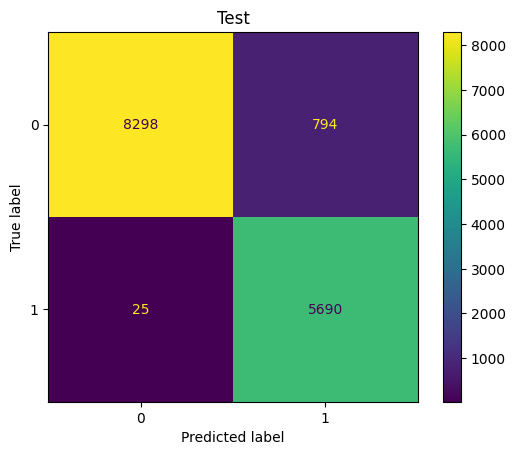

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import numpy as np

def displayConfusionMatrix(y_true, y_pred, title):
    # Convert predicted probabilities to binary predictions
    y_pred_binary = np.argmax(y_pred, axis=1)
    cm = confusion_matrix(y_true, y_pred_binary)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    disp.ax_.set_title(title)

displayConfusionMatrix(y_test, y_pred_test,  "Test")

Classification Report

In [40]:
from sklearn.metrics import classification_report

In [41]:

# Convert predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred_test, axis=1)

In [42]:
print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95      9092
           1       0.88      1.00      0.93      5715

    accuracy                           0.94     14807
   macro avg       0.94      0.95      0.94     14807
weighted avg       0.95      0.94      0.95     14807



Accuracy

In [43]:
from sklearn.metrics import accuracy_score

In [45]:
# Convert predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred_test, axis=1)

# Calculate and print accuracy using predicted labels (y_pred_labels)
print("Accuracy: "+str(accuracy_score(y_test, y_pred_labels)))

Accuracy: 0.9446883230904302
